In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import copy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer  # Bag of Words için
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Veri setini yükle
path = 'turkce_cumleler_kokler_corrected_50k.csv'
df = pd.read_csv(path)
df = df.drop(columns=['id', 'text'])

X = df['roots']
y = df['label']

df = df.head(2000)

In [3]:
# Eğitim ve test veri setlerini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Eksik verileri doldur
X_train = np.where(pd.isna(X_train), '', X_train)
X_test = np.where(pd.isna(X_test), '', X_test)

In [4]:
# Bag of Words vektörleştirme
vectorizer = CountVectorizer()
#vectorizer = CountVectorizer(max_features=500)   # Bag of Words için CountVectorizer kullanıyoruz
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [37]:
# Vocabulary büyüklüğünü yazdır
vocabulary_size = len(vectorizer.get_feature_names_out())
print(f"Vocabulary büyüklüğü: {vocabulary_size}")

# İlk 10 kelimeyi yazdır
print("İlk 10 kelime:", vectorizer.get_feature_names_out()[:1000])

Vocabulary büyüklüğü: 42954
İlk 10 kelime: ['00' '000' '0000' '0000dan' '0001' '00010300' '0006' '000i' '001' '0015'
 '0017' '008' '0097' '00dan' '01' '010' '0100' '01107661701' '0112' '0114'
 '0123' '0132' '0134' '01344833155' '0151' '01692760036' '01986191979'
 '02' '02000300' '0202' '02022022' '02125071453' '0224' '02419470899'
 '0244' '025' '02541463932' '0259' '0265' '0269' '02859688561' '03'
 '03052018' '0307' '03236860525' '033' '0330am' '0332' '03823153952'
 '0400' '0443' '04475912210' '046' '04610790771' '0493' '05' '0504'
 '05091921' '05136488817' '05154234783' '0525' '0530pm' '0531'
 '05339204540' '05354799780' '05366018340' '0538' '0541' '05522643909'
 '06' '060' '06068266580' '0610' '0614' '06266109224' '06344802112'
 '06923193852' '06933278111' '07' '0711de' '07149775637' '0715'
 '07662762806' '079' '07913405822' '07953982168' '07li' '08' '0800' '0802'
 '08022018' '0803' '0812' '08199134181' '0854' '088' '08995611779' '09'
 '090' '0900' '091' '0911' '0928' '093' '0930' '0

In [6]:
# Bag of Words'ten birkaç örnek yazdır
print("\nBag of Words örnekleri:")
feature_names = vectorizer.get_feature_names_out()
sample_indices = np.random.choice(X_train_bow.shape[0], 3, replace=False)  # Rastgele 3 örnek seç
for idx in sample_indices:
    print(f"Örnek {idx + 1}:")
    print("Orijinal:", X_train[idx])
    print("Bag of Words vektörü:", X_train_bow[idx].toarray()[0])


Bag of Words örnekleri:
Örnek 15325:
Orijinal:     netflixte film izlemek gelmek amk yahudi
Bag of Words vektörü: [0 0 0 ... 0 0 0]
Örnek 28583:
Orijinal:  guzel bolu 1 2 sinif eglence 3 sinifta yazma ogreniyosun 4sinifta stajdasin  temel saglam tutmak rahat rahat bitirirsin 
Bag of Words vektörü: [0 0 0 ... 0 0 0]
Örnek 9807:
Orijinal: mut gozukmek mutlu istemek
Bag of Words vektörü: [0 0 0 ... 0 0 0]


In [7]:
# Bag of Words'ten ilk 3 örneği yazdır
print("\nBag of Words örnekleri:")
feature_names = vectorizer.get_feature_names_out()
for idx in range(3):  # İlk 3 örnek
    print(f"Örnek {idx + 1}:")
    print("Orijinal:", X_train[idx])
    print("Bag of Words vektörü:", X_train_bow[idx].toarray()[0])


Bag of Words örnekleri:
Örnek 1:
Orijinal: bangtanin kazanmak bakanlik seci kalmak amkk gerci alirlae geliyorda 
Bag of Words vektörü: [0 0 0 ... 0 0 0]
Örnek 2:
Orijinal:  ev asi y
Bag of Words vektörü: [0 0 0 ... 0 0 0]
Örnek 3:
Orijinal:  kadin falaka yatirmak manyak vary el verecek sop sineklik verecek popo rt erdogan iktidar kalmak ay adet vuracaksin
Bag of Words vektörü: [0 0 0 ... 0 0 0]


In [8]:
# Logistic Regression modelini oluştur ve eğit
logreg_model = LogisticRegression(max_iter=1000)  # max_iter artırılabilir
logreg_model.fit(X_train_bow, y_train)

# Tahmin yap
y_pred = logreg_model.predict(X_test_bow)

# Modeli değerlendir
print("\nModel Performansı:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Model Performansı:
Accuracy: 0.8943396226415095
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      6756
           1       0.94      0.83      0.88      5964

    accuracy                           0.89     12720
   macro avg       0.90      0.89      0.89     12720
weighted avg       0.90      0.89      0.89     12720



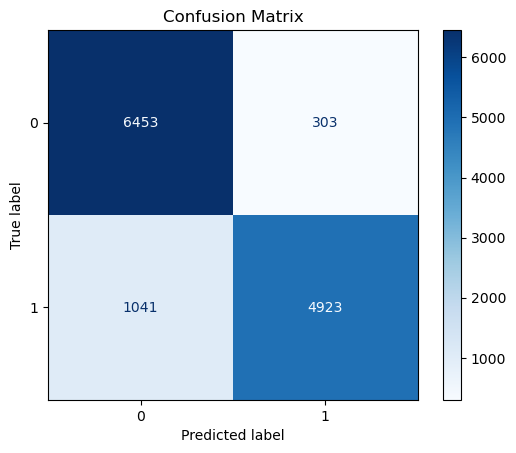

In [9]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()